In [80]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (10, 10))

In [81]:
import matplotlib.style as style
style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [82]:
path = "agrupadas_notas_normalizadoQuantil.csv"
dadosEnem = pd.read_csv(path,sep=';',low_memory=False,index_col=0)

In [83]:
var = 'Q002'
dadosEnem[var].replace(to_replace =['NaoEstudou'], 
                 value ='FundamentalIncompleto',inplace=True) 
dadosEnem

,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,...,RazaoPessoasQuarto,PessoasPorQuarto,mediaNota,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_CN,NOTA_REDACAO,Nome_Mesorregiao,Cluster
0,F,Preta,Estadual,Urbano,364.9,415.3,478.2,360.1,520.0,FundamentalIncompleto,...,1.50,"(1, 2]",427.70,"(300, 500]","(300, 500]","(300, 500]","(300, 500]","(500.0, 650.0]",Jequitinhonha,0
1,F,Parda,Estadual,Urbano,424.4,440.6,582.7,401.3,420.0,Medio,...,1.00,"(0, 1]",453.80,"(300, 500]","(500, 650]","(300, 500]","(300, 500]","(300.0, 500.0]",Jequitinhonha,0
2,F,Parda,Estadual,Urbano,479.0,378.7,484.5,492.2,520.0,FundamentalCompleto,...,2.00,"(1, 2]",470.88,"(300, 500]","(300, 500]","(300, 500]","(300, 500]","(500.0, 650.0]",Jequitinhonha,0
3,M,Branco,Estadual,Urbano,429.7,447.1,498.0,451.3,540.0,FundamentalIncompleto,...,1.50,"(1, 2]",473.22,"(300, 500]","(300, 500]","(300, 500]","(300, 500]","(500.0, 650.0]",Jequitinhonha,0
4,F,Parda,Estadual,Urbano,411.3,429.0,518.6,401.9,520.0,FundamentalIncompleto,...,1.33,"(1, 2]",456.16,"(300, 500]","(500, 650]","(300, 500]","(300, 500]","(500.0, 650.0]",Jequitinhonha,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86654,F,Branco,Estadual,Urbano,358.3,386.5,392.8,418.2,360.0,FundamentalIncompleto,...,2.00,"(1, 2]",383.16,"(300, 500]","(300, 500]","(300, 500]","(300, 500]","(300.0, 500.0]",Vale do Rio Doce,0
86655,M,Parda,Estadual,Urbano,437.8,487.1,399.8,436.1,560.0,FundamentalIncompleto,...,1.33,"(1, 2]",464.16,"(300, 500]","(300, 500]","(300, 500]","(300, 500]","(500.0, 650.0]",Vale do Rio Doce,0
86656,M,Parda,Estadual,Urbano,339.2,510.6,517.4,452.6,500.0,Medio,...,0.50,"(0, 1]",463.96,"(300, 500]","(500, 650]","(500, 650]","(300, 500]","(300.0, 500.0]",Vale do Rio Doce,0
86657,F,Branco,Estadual,Urbano,456.6,437.2,415.8,398.4,340.0,Superior,...,1.00,"(0, 1]",409.60,"(300, 500]","(300, 500]","(300, 500]","(300, 500]","(300.0, 500.0]",Zona da Mata,0


In [84]:
order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior']

In [85]:
def my_boxplot(Grupo,var1,var2,G):
    fig, ax = plt.subplots(figsize=(8, 8))
    df = Grupo
    #escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
    G = sns.boxplot(x=var1, y=var2, data=df, order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior'])
    G.set_xticklabels(G.get_xticklabels(),rotation=-30)
    G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
    G.set_xlabel(" ")
    G.set_ylabel(" ")


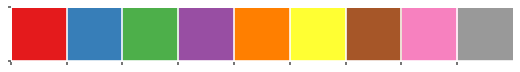

In [86]:
sns.palplot(sns.color_palette("Set1"))
sns.set_palette(sns.color_palette("Set1"))


Text(0, 0.5, ' ')

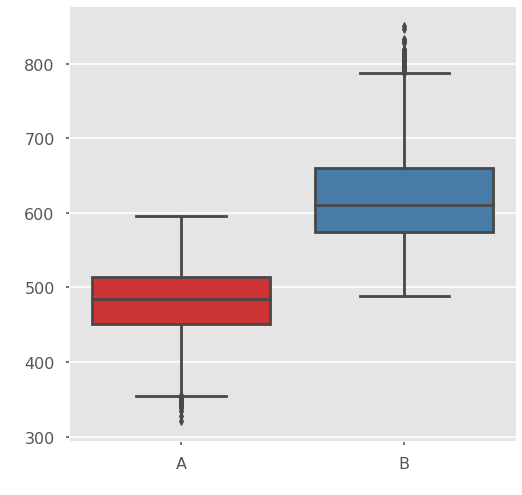

In [87]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="Cluster", y="mediaNota", data=df)

#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xticklabels(["A","B"])
G.set_xlabel(" ")
G.set_ylabel(" ")


Text(0, 0.5, 'Frequência (%)')

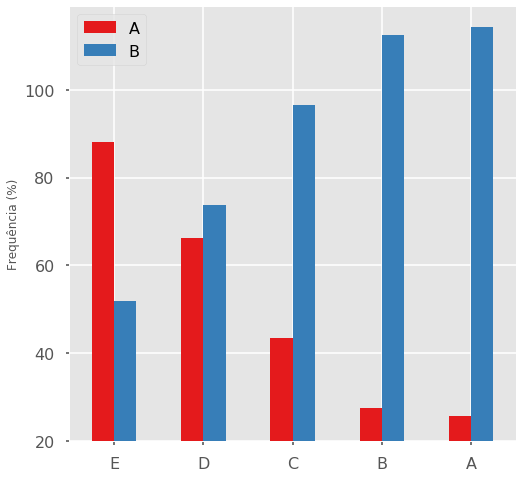

In [88]:
social = {} 
total_ClasseSocial_A = dadosEnem.query("ClasseSocial == 'A'").shape[0]
ClasseSocial_A_A = dadosEnem.query("ClasseSocial == 'A' and Cluster == 0").shape[0]/total_ClasseSocial_A
ClasseSocial_A_B = dadosEnem.query("ClasseSocial == 'A' and Cluster == 1").shape[0]/total_ClasseSocial_A
                                      
                                       
total_ClasseSocial_B = dadosEnem.query("ClasseSocial == 'B'").shape[0]
ClasseSocial_B_A = dadosEnem.query("ClasseSocial == 'B' and Cluster == 0").shape[0]/total_ClasseSocial_B
ClasseSocial_B_B = dadosEnem.query("ClasseSocial == 'B' and Cluster == 1").shape[0]/total_ClasseSocial_B
                                       
total_ClasseSocial_C = dadosEnem.query("ClasseSocial == 'C'").shape[0]
ClasseSocial_C_A = dadosEnem.query("ClasseSocial == 'C' and Cluster == 0").shape[0]/total_ClasseSocial_C
ClasseSocial_C_B = dadosEnem.query("ClasseSocial == 'C' and Cluster == 1").shape[0]/total_ClasseSocial_C

total_ClasseSocial_D = dadosEnem.query("ClasseSocial == 'D'").shape[0]
ClasseSocial_D_A = dadosEnem.query("ClasseSocial == 'D' and Cluster == 0").shape[0]/total_ClasseSocial_D
ClasseSocial_D_B = dadosEnem.query("ClasseSocial == 'D' and Cluster == 1").shape[0]/total_ClasseSocial_D


total_ClasseSocial_E = dadosEnem.query("ClasseSocial == 'E'").shape[0]
ClasseSocial_E_A = dadosEnem.query("ClasseSocial == 'E' and Cluster == 0").shape[0]/total_ClasseSocial_E
ClasseSocial_E_B = dadosEnem.query("ClasseSocial == 'E' and Cluster == 1").shape[0]/total_ClasseSocial_E


classePorCluster = [ClasseSocial_A_A,ClasseSocial_A_B,ClasseSocial_B_A,ClasseSocial_B_B,ClasseSocial_C_A,ClasseSocial_C_B,ClasseSocial_D_A,ClasseSocial_D_B,ClasseSocial_E_A,ClasseSocial_E_B]
teste = pd.DataFrame({'A':classePorCluster[:2],'B':classePorCluster[2:4],'C':classePorCluster[4:6],'D':classePorCluster[6:8],'E':classePorCluster[8:10]})
df = teste.T
df.columns = ['A','B']
df = df.iloc[::-1]


ax = df.plot(kind='bar',figsize=(8, 8))
ax.set_yticklabels(['20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.set_ylabel("Frequência (%)")




In [89]:
dadosEnem['RendaMaxima'].value_counts()

1497     22224
998      15890
2495     10394
1996      8908
3992      7042
2994      4512
4990      3924
5988      3184
19960     1936
0         1708
6986      1560
7984      1269
11976     1263
14970      990
9980       957
8982       898
Name: RendaMaxima, dtype: int64

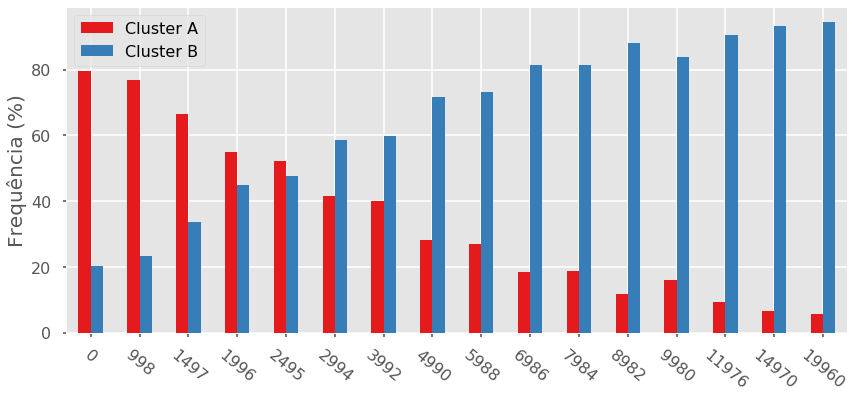

In [100]:
rendas = [] 
limites = ['0','998','1497','1996','2495','2994','3992','4990','5988','6986','7984','8982','9980','11976','14970','19960']

for var in limites:
    total_Renda = dadosEnem.query("RendaMaxima == " + var).shape[0]                                      
    rendas.append(dadosEnem.query("RendaMaxima == " + var + "and Cluster == 0").shape[0]/total_Renda)
    rendas.append(dadosEnem.query("RendaMaxima == " + var +  "and Cluster == 1").shape[0]/total_Renda)    



teste = pd.DataFrame({'0':rendas[:2], '998':rendas[2:4],'1497':rendas[4:6],'1996':rendas[6:8],'2495':rendas[8:10],
                      '2994':rendas[10:12],
                      '3992':rendas[12:14],'4990':rendas[14:16],'5988':rendas[16:18],'6986':rendas[18:20],'7984':rendas[20:22],
                      '8982':rendas[22:24],'9980':rendas[24:26],'11976':rendas[26:28],'14970':rendas[28:30],'19960':rendas[30:32]})

df = teste.T
df.columns = ['Cluster A','Cluster B']



ax = df.plot(kind='bar',figsize=(14, 6))

ax.set_yticklabels(['0','20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=-40)
text = ax.set_ylabel("Frequência (%)")
text.set_fontsize(20)
    



In [42]:
var = limites[0]
total_Renda = dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == 'Estadual'" ).shape[0]   

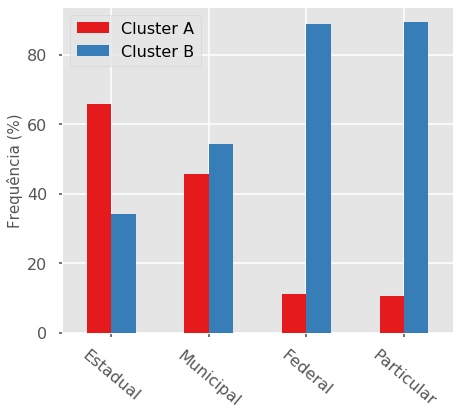

In [105]:
rendas = [] 
limites = ["'Estadual'","'Municipal'","'Federal'","'Particular'"]

for var in limites:
    total_Renda = dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == " + var).shape[0]                                      
    rendas.append(dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == " + var + "and Cluster == 0").shape[0]/total_Renda)
    rendas.append(dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == " + var +  "and Cluster == 1").shape[0]/total_Renda)    



teste = pd.DataFrame({'Estadual':rendas[:2], 'Municipal':rendas[2:4],'Federal':rendas[4:6],'Particular':rendas[6:8]})

df = teste.T
df.columns = ['Cluster A','Cluster B']



ax = df.plot(kind='bar',figsize=(7,6))
ax.set_yticklabels(['0','20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=-40)
text = ax.set_ylabel("Frequência (%)")
text.set_fontsize(15)    


In [44]:
dadosEnem['TP_COR_RACA'].replace(to_replace =['Preta','Parda','Amarelo','Indigena'], value ='NãoBranco',inplace=True) 
dadosEnem['TP_COR_RACA'].replace(to_replace =['NaoDeclarado'], value ='NãoDeclarado',inplace=True)

In [45]:
var = "'NãoBranco'"
dadosEnem.query("TP_COR_RACA == " + var + "and Cluster == 0").shape[0]

31024

In [120]:


rendas = [] 
limites = ["'NãoBranco'","'Branco'","'NãoDeclarado'"]

for var in limites:
    total_Renda = dadosEnem.query("TP_COR_RACA == " + var).shape[0]                                      
    rendas.append(dadosEnem.query("TP_COR_RACA == " + var + "and Cluster == 0").shape[0]/total_Renda)
    rendas.append(dadosEnem.query("TP_COR_RACA == " + var +  "and Cluster == 1").shape[0]/total_Renda)    



teste = pd.DataFrame({'NãoBranco':rendas[:2], 'Branco':rendas[2:4],'NãoDeclarado':rendas[4:6]})

df = teste.T
df.columns = ['A','B']



ax = df.plot(kind='bar',figsize=(5, 6))
#ax.set_yticklabels(['20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=-40)
ax.set_ylabel("Frequência (%)")
    


ZeroDivisionError: division by zero

In [123]:
dadosAgrupados = pd.read_csv("agrupadas_notas_processado.csv")

In [124]:
dadosAgrupados.TP_COR_RACA.value_counts()

NãoBranco       49855
Branco          35330
NaoDeclarado     1474
Name: TP_COR_RACA, dtype: int64

In [125]:
dadosAgrupados['TP_COR_RACA'].replace(to_replace =['NaoDeclarado'], value ='NãoDeclarado',inplace=True)

In [126]:
dadosAgrupados.TP_COR_RACA.value_counts()

NãoBranco       49855
Branco          35330
NãoDeclarado     1474
Name: TP_COR_RACA, dtype: int64

8817
29798
10728
512


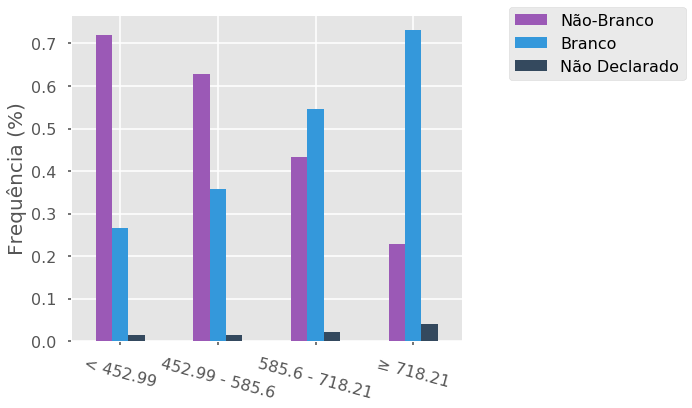

In [143]:
rendas = [] 
limites = ["'< 452.99'","'452.99 - 585.6'","'585.6 - 718.21'","'≥ 718.21'"]

for var in limites:
    total_Renda = dadosAgrupados.query("mediaNota == " + var).shape[0] 
    print(dadosAgrupados.query("mediaNota == " + var + "and TP_COR_RACA == 'NãoBranco'").shape[0])
    rendas.append(dadosAgrupados.query("mediaNota == " + var + "and TP_COR_RACA == 'NãoBranco'").shape[0]/total_Renda)
    rendas.append(dadosAgrupados.query("mediaNota == " + var +  "and TP_COR_RACA == 'Branco'").shape[0]/total_Renda)
    rendas.append(dadosAgrupados.query("mediaNota == " + var +  "and TP_COR_RACA == 'NãoDeclarado'").shape[0]/total_Renda)   



data = pd.DataFrame({
    '< 452.99':rendas[:3], '452.99 - 585.6':rendas[3:6],'585.6 - 718.21':rendas[6:9], '≥ 718.21': rendas[9:12] })

data = data.T
data.columns = ['Não-Branco','Branco','Não Declarado']


ax = data.plot(kind='bar',figsize=(7, 6))
#ax.set_yticklabels(['20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=-15)
text = ax.set_ylabel("Frequência (%)")
legend = ax.legend(bbox_to_anchor=(1.1, 1.05))   
text.set_fontsize(20)
    


In [52]:
df

,A,B
NãoBranco,0.622285,0.377715
Branco,0.417294,0.582706
NãoDeclarado,0.442334,0.557666


In [53]:
total_Renda

2231

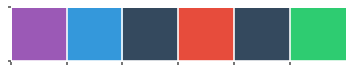

In [137]:
flatui = ["#9b59b6", "#3498db", "#34495e", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))
sns.set_palette(sns.color_palette(flatui))


In [55]:
sns.choose_colorbrewer_palette("qualitative")
#qualitative
#sequential

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

In [56]:
my_pal = [(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]



In [107]:
dadosEnem['Cluster'].replace(to_replace =[0], value ='A',inplace=True) 
dadosEnem['Cluster'].replace(to_replace =[1], value ='B',inplace=True) 
dadosEnem

,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,...,RazaoPessoasQuarto,PessoasPorQuarto,mediaNota,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_CN,NOTA_REDACAO,Nome_Mesorregiao,Cluster
0,F,Preta,Estadual,Urbano,364.9,415.3,478.2,360.1,520.0,FundamentalIncompleto,...,1.50,"(1, 2]",427.70,"(300, 500]","(300, 500]","(300, 500]","(300, 500]","(500.0, 650.0]",Jequitinhonha,A
1,F,Parda,Estadual,Urbano,424.4,440.6,582.7,401.3,420.0,Medio,...,1.00,"(0, 1]",453.80,"(300, 500]","(500, 650]","(300, 500]","(300, 500]","(300.0, 500.0]",Jequitinhonha,A
2,F,Parda,Estadual,Urbano,479.0,378.7,484.5,492.2,520.0,FundamentalCompleto,...,2.00,"(1, 2]",470.88,"(300, 500]","(300, 500]","(300, 500]","(300, 500]","(500.0, 650.0]",Jequitinhonha,A
3,M,Branco,Estadual,Urbano,429.7,447.1,498.0,451.3,540.0,FundamentalIncompleto,...,1.50,"(1, 2]",473.22,"(300, 500]","(300, 500]","(300, 500]","(300, 500]","(500.0, 650.0]",Jequitinhonha,A
4,F,Parda,Estadual,Urbano,411.3,429.0,518.6,401.9,520.0,FundamentalIncompleto,...,1.33,"(1, 2]",456.16,"(300, 500]","(500, 650]","(300, 500]","(300, 500]","(500.0, 650.0]",Jequitinhonha,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86654,F,Branco,Estadual,Urbano,358.3,386.5,392.8,418.2,360.0,FundamentalIncompleto,...,2.00,"(1, 2]",383.16,"(300, 500]","(300, 500]","(300, 500]","(300, 500]","(300.0, 500.0]",Vale do Rio Doce,A
86655,M,Parda,Estadual,Urbano,437.8,487.1,399.8,436.1,560.0,FundamentalIncompleto,...,1.33,"(1, 2]",464.16,"(300, 500]","(300, 500]","(300, 500]","(300, 500]","(500.0, 650.0]",Vale do Rio Doce,A
86656,M,Parda,Estadual,Urbano,339.2,510.6,517.4,452.6,500.0,Medio,...,0.50,"(0, 1]",463.96,"(300, 500]","(500, 650]","(500, 650]","(300, 500]","(300.0, 500.0]",Vale do Rio Doce,A
86657,F,Branco,Estadual,Urbano,456.6,437.2,415.8,398.4,340.0,Superior,...,1.00,"(0, 1]",409.60,"(300, 500]","(300, 500]","(300, 500]","(300, 500]","(300.0, 500.0]",Zona da Mata,A


from pandas.plotting import parallel_coordinates

sample = dadosEnem.query("Nome_Mesorregiao == 'Zona da Mata'")

parallel_coordinates(sample[['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','Cluster']], 'Cluster',color=[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),(0.21568627450980393, 0.4941176470588236, 0.7215686274509804)])

In [58]:
import re



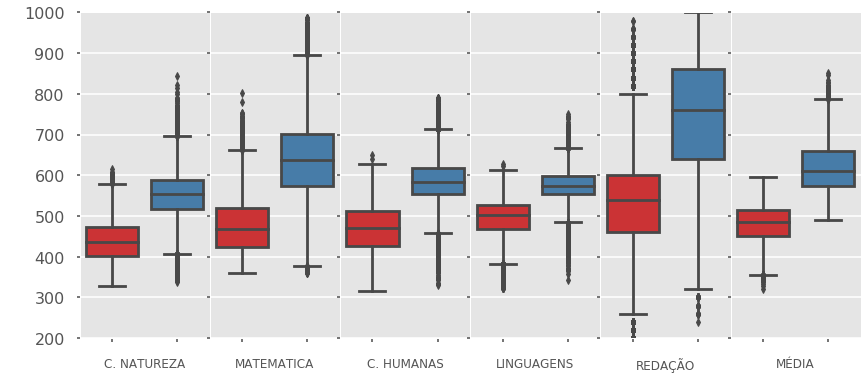

In [59]:
sns.set_palette(sns.color_palette("Set1"))


df = dadosEnem
df["Nota_Média"] = df["mediaNota"]
area = plt.figure(figsize=(14, 6))
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
notas = ['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','mediaNota']
nomes = ['C. NATUREZA','MATEMATICA','C. HUMANAS','LINGUAGENS','REDAÇÃO','MÉDIA']
for i in range(len(notas)):
    g = area.add_subplot(1, 6, i+1)
    g = sns.boxplot(x="Cluster", y=notas[i], data=df)
    #print(notas[i])
    A = df.query("Cluster == 'A'")[notas[i]].median()
    B = df.query("Cluster == 'B'")[notas[i]].median()
    #print("Notas Custer A", A)
    #print("Notas Custer B", B )
    #print("Diferença: ", B - A)
    #print("-----")
    g.set_ylabel(" ")
    g.set_xlabel(nomes[i])
    g.set_ylim(200,1001)
    g.set_xticklabels("")
    if(i!=0):
        g.set_yticklabels("")
       



plt.subplots_adjust(wspace = 0)


#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
#G.set_xlabel(" ")
#G.set_ylabel(" ")

In [60]:
#randaMaxByCluster = dadosEnem.Cluster.value_counts()
#ax = sns.barplot(x="RendaMaxima", y="mediaNota", hue="Cluster",data=dadosEnem, estimator=lambda x: sum(x==0)*100.0/len(x))

In [61]:
    print("Notas Custer A", df.query("Cluster == 'A'")["NU_NOTA_MT"].median())
    
    print("Notas Custer B", df.query("Cluster == 'B'")["NU_NOTA_MT"].median())

Notas Custer A 467.3
Notas Custer B 638.6


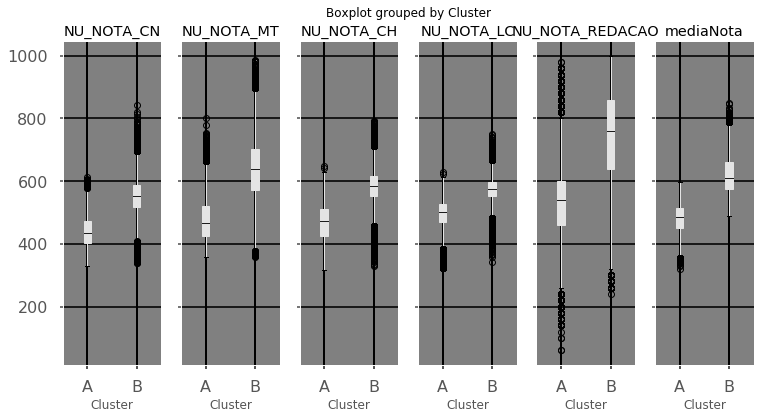

In [62]:
bplot = dadosEnem.boxplot(by="Cluster", column=['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','mediaNota'],patch_artist=True, positions=[1,2] 
                    , figsize=(12,6),grid=True, fontsize=16,layout=(1,6))


for i in range(len(bplot)):
    bplot[i].set_facecolor('grey')
    bplot[i].grid(color="black")

Text(0, 0.5, ' ')

<Figure size 921.6x633.6 with 0 Axes>

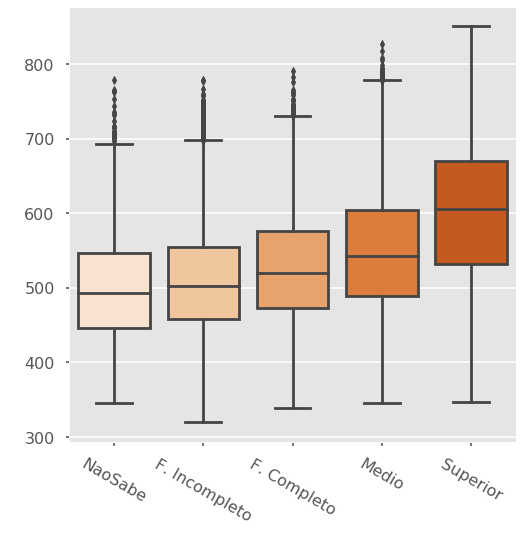

In [132]:
sns.set_palette(sns.color_palette("Oranges"))
area = plt.figure()


area.tight_layout(pad=10)


fig, ax = plt.subplots(figsize=(8, 8))
G = sns.boxplot(x="Q002", y="mediaNota", data=dadosEnem, order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior'])
G.set_xticklabels(G.get_xticklabels(),rotation=-30)
G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")



Text(0, 0.5, ' ')

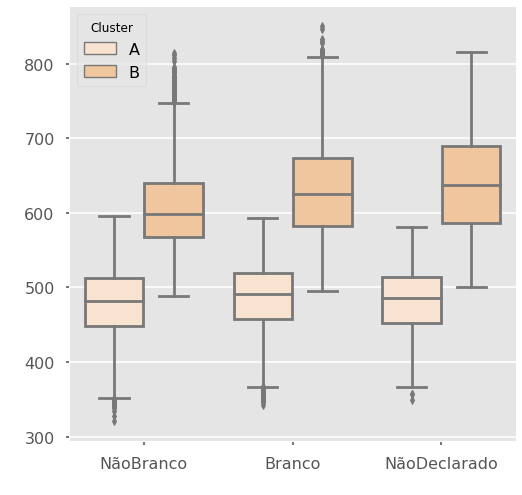

In [65]:
dadosEnem['TP_COR_RACA'].replace(to_replace =['Preta','Parda','Amarelo','Indigena'], value ='NãoBranco',inplace=True) 
dadosEnem['TP_COR_RACA'].replace(to_replace =[1], value ='B',inplace=True) 
fig, ax = plt.subplots(figsize=(8, 8))
df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="TP_COR_RACA", y="mediaNota", hue="Cluster",data=df)
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")

Text(0, 0.5, ' ')

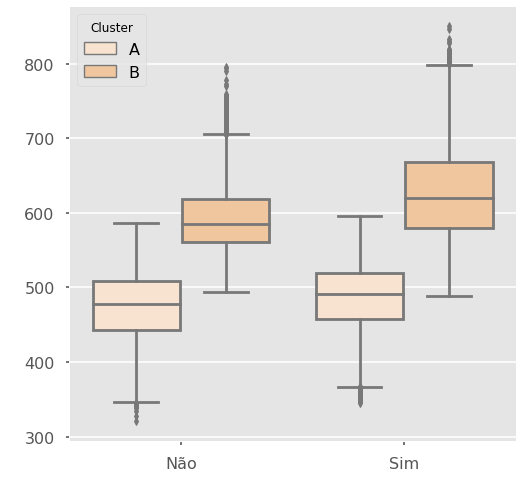

In [66]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="Q024", y="mediaNota", hue="Cluster", data=df)
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")



Text(0, 0.5, ' ')

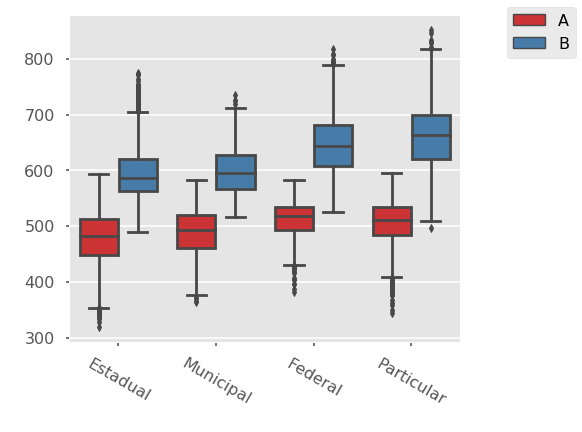

In [114]:
sns.set_palette(sns.color_palette("Set1"))
fig, ax = plt.subplots(figsize=(7, 6))
df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="TP_DEPENDENCIA_ADM_ESC", y="mediaNota",  hue="Cluster", data=df,  order=['Estadual','Municipal','Federal','Particular'])
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
legend = G.legend(bbox_to_anchor=(1.1, 1.05))
G.set_xticklabels(G.get_xticklabels(),rotation=-30)
G.set_ylabel(" ")


Text(0, 0.5, ' ')

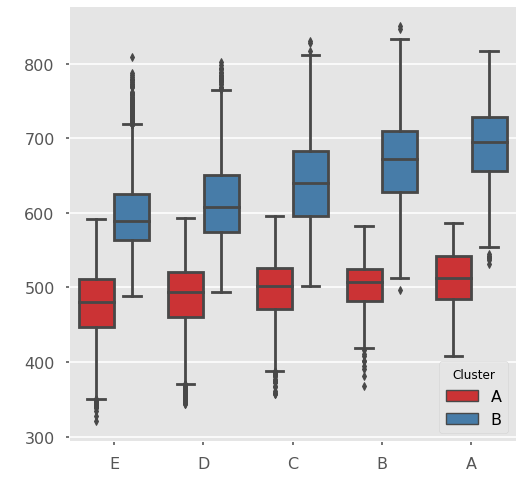

In [70]:
fig, ax = plt.subplots(figsize=(8, 8))
df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="ClasseSocial", y="mediaNota", data=df,  hue="Cluster", order=['E','D','C','B','A'])
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")

Text(0, 0.5, ' ')

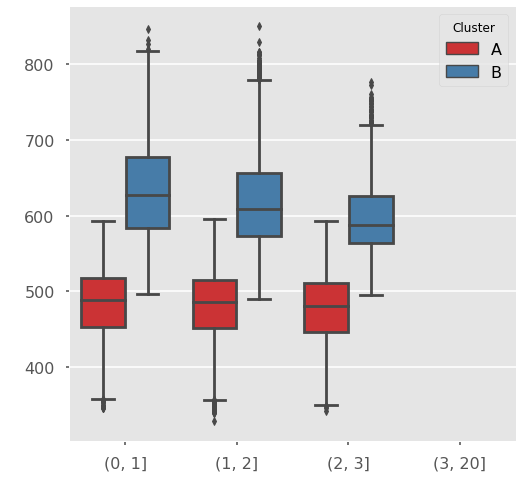

In [71]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="PessoasPorQuarto", y="mediaNota", hue="Cluster", data=df, order=['(0, 1]','(1, 2]','(2, 3]','(3, 20]'])
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")

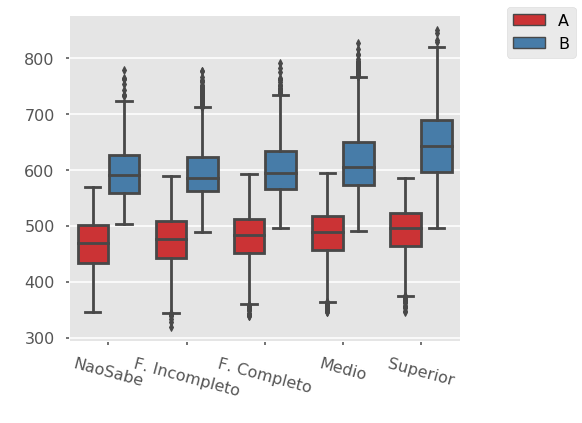

In [119]:
fig, ax = plt.subplots(figsize=(7, 6))
df = dadosEnem
G = sns.boxplot(x="Q002", y="mediaNota", data=df, hue="Cluster", order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior'])
G.set_xticklabels(G.get_xticklabels(),rotation=-15)
G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")
legend = G.legend(bbox_to_anchor=(1.1, 1.05))


TypeError: boxplot() got an unexpected keyword argument 'legend'

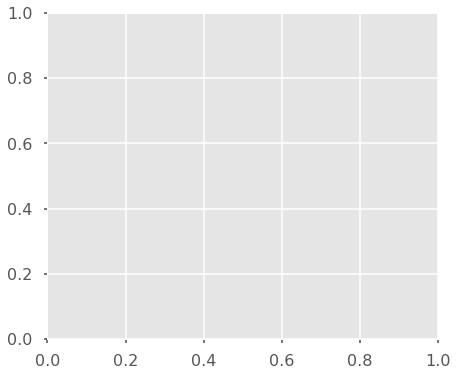

In [116]:
fig, ax = plt.subplots(figsize=(7, 6))
df = dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == 'Particular'")
G = sns.boxplot(x="Q002", y="mediaNota", data=df, hue="Cluster", order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior'])
G.set_xticklabels(G.get_xticklabels(),rotation=-10)
G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")
G.legend()

Text(0, 0.5, ' ')

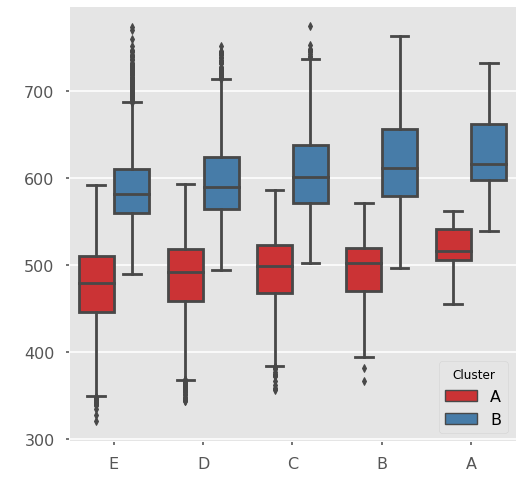

In [74]:
fig, ax = plt.subplots(figsize=(8, 8))
df = dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == 'Estadual'")
G = sns.boxplot(x="ClasseSocial", y="mediaNota", data=df, hue="Cluster",order=['E','D','C','B','A'])
G.set_xlabel(" ")
G.set_ylabel(" ")

In [75]:
Estadual = dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == 'Estadual'")
total = Estadual.shape[0]

In [76]:
info = {} 
info['naoSabe'] =  {}
info['naoSabe']['A'] =  Estadual.query("Q002 == 'NaoSabe' and Cluster == 0").shape[0]/total
info['naoSabe']['B'] =  Estadual.query("Q002 == 'NaoSabe' and Cluster == 1").shape[0]/total



info['incompleto'] = {}
info['incompleto']['A'] =  Estadual.query("Q002 == 'FundamentalIncompleto' and Cluster == 0").shape[0]/total
info['incompleto']['B'] =  Estadual.query("Q002 == 'FundamentalIncompleto' and Cluster == 1").shape[0]/total
info['completo'] = {}
info['completo']['A'] =  Estadual.query("Q002 == 'FundamentalCompleto' and Cluster == 0").shape[0]/total
info['completo']['B'] =  Estadual.query("Q002 == 'FundamentalCompleto' and Cluster == 1").shape[0]/total
info['medio'] = {}
info['medio']['A'] =  Estadual.query("Q002 == 'Medio' and Cluster == 0").shape[0]/total
info['medio']['B'] =  Estadual.query("Q002 == 'Medio' and Cluster == 1 ").shape[0]/total
info['superior'] = {}     
info['superior']['A'] =  Estadual.query("Q002 == 'Superior' and Cluster == 0").shape[0]/total
info['superior']['B'] =  Estadual.query("Q002 == 'Superior' and Cluster == 1").shape[0]/total




Text(0, 0.5, 'Porcentagem do TOTAL de alunos de escola estadual')

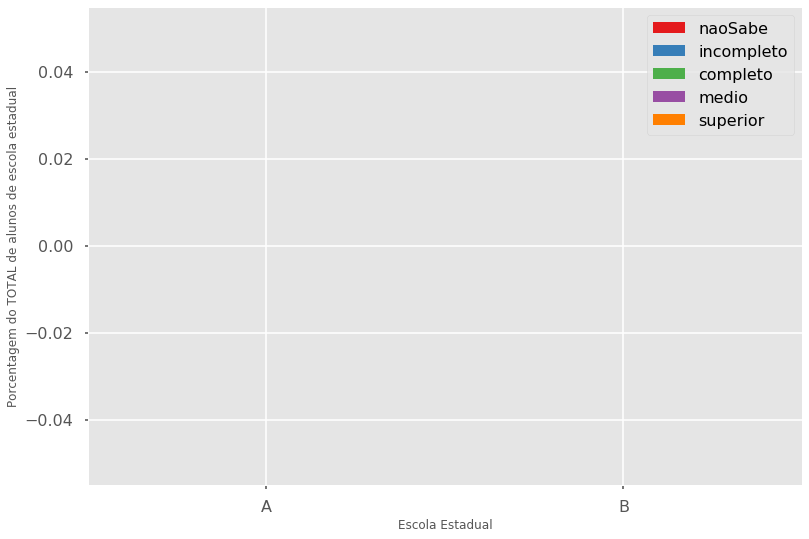

In [77]:
dados = pd.DataFrame(info)
ax = dados.plot(kind='bar')
ax.set_xlabel("Escola Estadual")
ax.set_xticklabels(ax.get_xticklabels(),rotation="0")
ax.set_ylabel("Porcentagem do TOTAL de alunos de escola estadual")

In [78]:
current_palette = sns.color_palette()
current_palette[:2]
#sns.palplot(current_palette)

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)]